In [207]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

In [208]:
import platform
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc

path = "c:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    print("Hangul OK in your MAC!!!")
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    print("Hangul OK in your Windows!!!")
    rc("font", family=font_name)
else:
    print("Unknown system.. sorry~~~")
    
plt.rcParams["axes.unicode_minus"] = False 


Hangul OK in your Windows!!!


### 이상한 나라의 엘리스 wordcloud로 표현하기

In [209]:
text = open('./data/06_alice.txt').read()
alice_mask = np.array(Image.open('./data/06_alice_mask.png'))

stopwords = set(STOPWORDS) # 본문에서 많이 차지하는 단어는 set(STOPWORDS) 처리
stopwords.add('said') # 엘리스에 많이 나오는 단어로 said가 있어 stopword에 추가

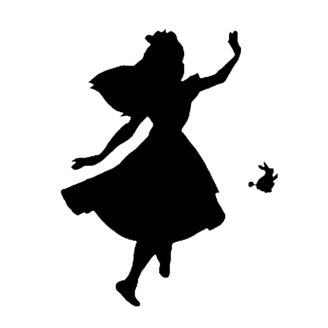

In [210]:
plt.figure(figsize=(4, 4))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
# .imshow : image show
plt.axis('off')
plt.show()

### WordCloud
- 자체적으로 단어를 추출해서 빈도수를 조사하고 정규화하는 기능
- background_color = : 배경색
- max_words : 표현할 단어의 수
- mask : 표현할 그림
- stopwords : 제외할 단어
- .generate(text) 로 활성화
- words_ : 단어 발생 빈도

In [211]:
wc = WordCloud(background_color='white', max_words=2000,
               mask=alice_mask, stopwords=stopwords)
wc = wc.generate(text)
wc.words_

{'Alice': 1.0,
 'little': 0.29508196721311475,
 'one': 0.27595628415300544,
 'know': 0.2459016393442623,
 'went': 0.226775956284153,
 'thing': 0.2185792349726776,
 'time': 0.2103825136612022,
 'Queen': 0.20765027322404372,
 'see': 0.1830601092896175,
 'King': 0.17486338797814208,
 'well': 0.1721311475409836,
 'now': 0.16393442622950818,
 'head': 0.16393442622950818,
 'began': 0.15846994535519127,
 'way': 0.1557377049180328,
 'Hatter': 0.1557377049180328,
 'Mock Turtle': 0.15300546448087432,
 'say': 0.15027322404371585,
 'Gryphon': 0.15027322404371585,
 'think': 0.1448087431693989,
 'quite': 0.14207650273224043,
 'much': 0.13934426229508196,
 'first': 0.13934426229508196,
 'thought': 0.1366120218579235,
 'go': 0.1366120218579235,
 'come': 0.13114754098360656,
 'never': 0.1284153005464481,
 'voice': 0.12568306010928962,
 'looked': 0.12295081967213115,
 'got': 0.12295081967213115,
 'must': 0.12021857923497267,
 'Cat': 0.12021857923497267,
 'Duchess': 0.11475409836065574,
 'Mouse': 0.11202

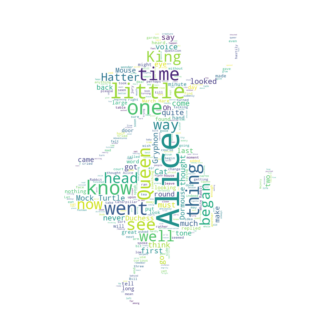

In [212]:
plt.figure(figsize=(4, 4))
plt.imshow(wc, interpolation='bilinear')
# .imshow : image show
plt.axis('off')
plt.show()

### 스타워즈 wordcloud로 표현하기

In [213]:
text = open("./data/06_a_new_hope.txt").read()

text = text.replace("HAN", "Han")
text = text.replace("LUKE's", "Luke")

mask = np.array(Image.open("./data/06_stormtrooper_mask.png"))

In [214]:
stopwords = set(STOPWORDS)
stopwords.add('int')
stopwords.add('ext')

### WordCloud
- 자체적으로 단어를 추출해서 빈도수를 조사하고 정규화하는 기능
- max_words : 표현할 단어의 수
- mask : 표현할 그림
- stopwords : 제외할 단어
- .generate(text) 로 활성화

In [215]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, 
               margin=10, random_state=13).generate(text)

default_colors = wc.to_array()

### gray_color_func
- WordCloud 공식 홈페이지에서 사용하는 그레이톤 색상함수
- .recolor() : 설정한 컬러 설정

In [216]:
import random

def gray_color_func(
        word, font_size, position, orientation, random_state=None,
        **kawrgs
        ):
    return 'hsl(0, 0%%, %d%%)' % random.randint(60, 100)

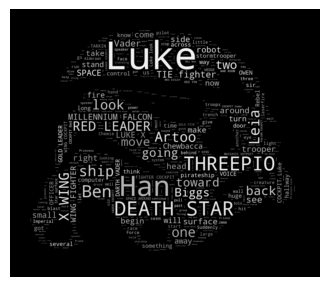

In [217]:
plt.figure(figsize=(4, 4))
plt.imshow(
    wc.recolor(color_func=gray_color_func, random_state=3),
    interpolation='bilinear'
    )
plt.axis('off')
plt.show()

### 육아휴직 관련 법안

In [218]:
import nltk

In [219]:
from konlpy.corpus import kobill

doc_ko = kobill.open('1809890.txt').read()

In [220]:
doc_ko

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------

### 명사만 추출(=Okt.nouns())하여 토큰화(tokens)

In [221]:
from konlpy.tag import Okt

t = Okt()
tokens_ko = t.nouns(doc_ko) # .nouns() :명사만 추출
tokens_ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '정의화',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발',
 '의',
 '자',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '만',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '만',
 '세',
 '이하',
 '개정',
 '것임',
 '안',
 '제',
 '항제',
 '호',
 '법률',
 '제',
 '호',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '호',
 '중',
 '만',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '만',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '의',
 '자녀',
 '로',
 '부',
 '칙',
 '이',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '안',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '

In [222]:
ko = nltk.Text(tokens_ko, name='대한민국 국회 의안 제 1809890호')

In [223]:
print(len(ko.tokens)) # 명사로 분석된 전체 토큰의 갯수
print(len(set(ko.tokens))) # 명사로 분석된 유일한 토큰의 갯수
ko.vocab() # 각 명사로 분석된 토큰의 빈도수

735
250


FreqDist({'육아휴직': 38, '발생': 19, '만': 18, '이하': 18, '비용': 17, '액': 17, '경우': 16, '세': 16, '자녀': 14, '고용': 14, ...})

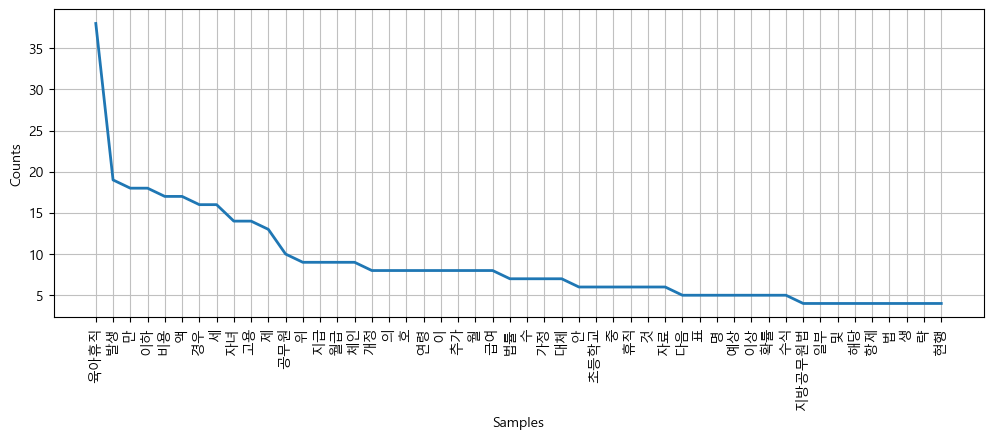

In [224]:
plt.figure(figsize=(12, 4))
ko.plot(50) # 가장 많은 빈도수를 가진 단어 50개만 표현하라
plt.show()

### stopword 설정
- 한글은 영어와 다르게 stopwords가 깔끔하게 잡히지 않으므로 필요한 단어는 추가해야 된다

In [225]:
stop_words = ['.', '(', ')', ',', '%', '-', 'X', ').', 'x', '의', '자', '에', '안', '번', '호', '을', '이', '다', '만', '로', '가', '를']

In [226]:
ko = [each_word for each_word in ko 
      if each_word not in stop_words]
# ko에서 각각 단어들을 가져와 each_word로 for문을 돌릴 때 each_word가 stop_words 안에 없다면 each_word를 ko 리스트 형으로 저장해라

In [227]:
ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '정의화',
 '의원',
 '대표',
 '발의',
 '발의',
 '연월일',
 '발',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '세',
 '이하',
 '개정',
 '것임',
 '제',
 '항제',
 '법률',
 '제',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '중',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '자녀',
 '부',
 '칙',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '하나',
 '해당',
 '사유',
 '직',
 '임용',
 '휴직',
 '명',
 '수',
 '다만',
 '제',
 '경우',
 '대통령령',
 '정',
 '사정',
 '직',
 '명',
 '생',
 '략',
 '현

### ko stop_words 설정 후 nltk.Text 재지정한 빈도수 변화

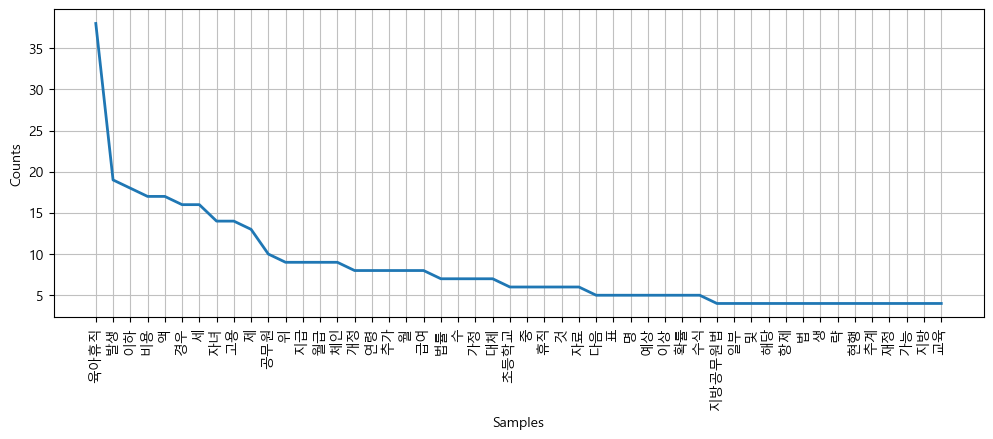

In [228]:
ko = nltk.Text(ko, name='대한민국 국회 의안 제 1809890호')

plt.figure(figsize=(12, 4))
ko.plot(50) # 가장 많은 빈도수를 가진 단어 50개만 표현하라
plt.show()

In [229]:
ko.count('육아휴직')

38

<Figure size 1200x600 with 0 Axes>

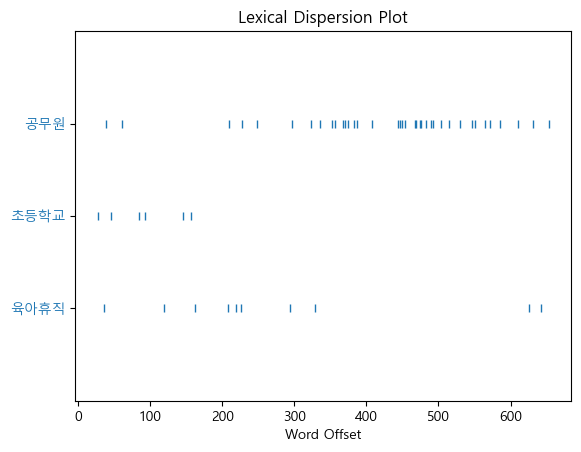

In [230]:
plt.figure(figsize=(12, 6))
ko.dispersion_plot(['육아휴직', '초등학교', '공무원'])

### 연어 : 함께 위치하는 단어들이란 뜻으로 어휘의 조합 또는 짝을 이루는 말
- ex. friend와 주로 쓰이는 형용사 best, good 등 
- 한번도 안나타날 수도 있다

In [231]:
ko.collocations()

초등학교 저학년; 근로자 육아휴직; 육아휴직 대상자; 공무원 육아휴직


### wordcloud
- relative_scaling : wordcloud 표현할 단어의 간격
- .generate_from_frequencies(dictionary형) : 단어와 빈도로 단어 표현

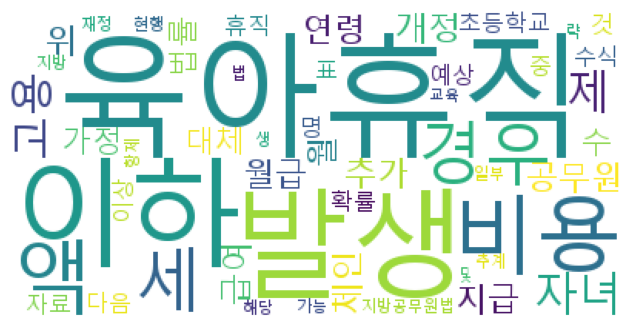

In [232]:
data = ko.vocab().most_common(50) # vocab() : 각 명사로 분석된 토큰의 빈도수

wordcloud = WordCloud(
    font_path="c:/Windows/Fonts/malgun.ttf",
    relative_scaling = 0.2,
    background_color='white'
    ).generate_from_frequencies(dict(data))

plt.figure(figsize=(12, 4))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Naive Bayes Classifier(나이브 베이즈 분류)
- 특성들 사이의 독립을 가정하는 베이즈 정리를 적용한 확률 분류기

### 영어 감성분석

In [233]:
from nltk.tokenize import word_tokenize # nltk.tokenize : 띄어쓰기로 분류
import nltk

- Naive Bayes 분류기는 지도학습으로서 정답(label)을 알려주어야 한다

In [234]:
train = [
    ('i like you','pos'),
    ('i hate you','neg'),
    ('you like me','neg'),
    ('i like her','pos')
]

### 말뭉치 만들기

In [235]:
train[0] # train의 첫번째 데이터

('i like you', 'pos')

In [236]:
train[0][0] # train의 첫번째의 첫번쨰 데이터

'i like you'

In [237]:
sentence = train[0] # train의 첫번째 데이터
word_tokenize(sentence[0]) # train의 첫번째의 첫번쨰 데이터를 띄어쓰기별로 구분해라, sentence[0] = train[0][0] 

['i', 'like', 'you']

In [238]:
# ?.lower() = ? 문자를 소문자열로 변환
[word.lower() for sentence in train for word in word_tokenize(sentence[0])]
# 중복값 발생

['i',
 'like',
 'you',
 'i',
 'hate',
 'you',
 'you',
 'like',
 'me',
 'i',
 'like',
 'her']

In [239]:
# set을 통해 중복값 제외
all_words = set(
    word.lower() for sentence in train for word in word_tokenize(sentence[0])
)
all_words

{'hate', 'her', 'i', 'like', 'me', 'you'}

### 말뭉치별로 단어가 있고 없음을 판단

In [240]:
t = [({word : (word in word_tokenize(x[0])) for word in all_words}, x[1]) for x in train]
# for x in train : train에서 x를 하나씩 뺴온다 ('i like you', 'pos')
# x[0] = 'i like you', word_tokenize(x[0]) = 'i', 'like', 'you', x[1] = pos or neg 
# word in word_tokenize(x[0])) for word in all_words : 상기의 all_words({'hate', 'her', 'i', 'like', 'me', 'you'})에서 하나씩 word로 뺴와서
# word_tokenize(x[0])로 분류된 word('i', 'like', 'you')에 있는 지를 각단어별로 하나씩 확인 
# 각 word_tokenize(x[0])로 분류된 word('i', 'like', 'you')와 all_words({'hate', 'her', 'i', 'like', 'me', 'you'}) 하나씩 비교해가면서 x[1] = pos or neg 판단
t

[({'hate': False,
   'her': False,
   'me': False,
   'i': True,
   'you': True,
   'like': True},
  'pos'),
 ({'hate': True,
   'her': False,
   'me': False,
   'i': True,
   'you': True,
   'like': False},
  'neg'),
 ({'hate': False,
   'her': False,
   'me': True,
   'i': False,
   'you': True,
   'like': True},
  'neg'),
 ({'hate': False,
   'her': True,
   'me': False,
   'i': True,
   'you': False,
   'like': True},
  'pos')]

### nltk.NaiveBayesClassifier
- .train : 학습해라, run()과 같은 의미
- .show_most_informative_features() : 가장 많은 정보를 담고 있는 특성들을 나열하라는 메써드

In [241]:
classifier = nltk.NaiveBayesClassifier.train(t) # .train : 학습해라, run()과 같은 의미
classifier.show_most_informative_features()

Most Informative Features
                    hate = False             pos : neg    =      1.7 : 1.0
                     her = False             neg : pos    =      1.7 : 1.0
                       i = True              pos : neg    =      1.7 : 1.0
                    like = True              pos : neg    =      1.7 : 1.0
                      me = False             pos : neg    =      1.7 : 1.0
                     you = True              neg : pos    =      1.7 : 1.0


##### 상기 결과는 hate 라는 단어가 없다는 것이 1.7:1.0으로 positive하며, i 라는 단어가 있을 시 1.7:1.0으로 positive 하다

In [242]:
test_sentence = 'i like MeRui'
test_sent_features = {
    word.lower() : (word in word_tokenize(test_sentence.lower())) for word in all_words
}
test_sent_features

{'hate': False,
 'her': False,
 'me': False,
 'i': True,
 'you': False,
 'like': True}

### .classify() : nltk에서의 예측하라는 명령어, predict와 같은 기능

In [243]:
classifier.classify(test_sent_features)

'pos'

### 한글 감성 분석

In [244]:
from konlpy.tag import Okt

In [245]:
pos_tagger = Okt()

In [246]:
train = [
    ('메리가 좋아', 'pos'),
    ('고양이도 좋아', 'pos'),
    ('난 수업이 지루해', 'neg'),
    ('메리는 이쁜 고양이야', 'pos'),
    ('난 마치고 메리랑 놀거야', 'pos')
]

In [247]:
all_words = set(
    word for sentence in train for word in word_tokenize(sentence[0])
)
all_words

{'고양이도',
 '고양이야',
 '난',
 '놀거야',
 '마치고',
 '메리가',
 '메리는',
 '메리랑',
 '수업이',
 '이쁜',
 '좋아',
 '지루해'}

##### 상기 결과에서 메리는 같은 단어이지만 메리가, 메리는 으로 구분하여 다른 단어로 인식한다

In [248]:
t = [({word : (word in word_tokenize(x[0])) for word in all_words}, x[1]) for x in train]
t

[({'지루해': False,
   '메리는': False,
   '메리랑': False,
   '수업이': False,
   '고양이도': False,
   '좋아': True,
   '놀거야': False,
   '고양이야': False,
   '마치고': False,
   '난': False,
   '메리가': True,
   '이쁜': False},
  'pos'),
 ({'지루해': False,
   '메리는': False,
   '메리랑': False,
   '수업이': False,
   '고양이도': True,
   '좋아': True,
   '놀거야': False,
   '고양이야': False,
   '마치고': False,
   '난': False,
   '메리가': False,
   '이쁜': False},
  'pos'),
 ({'지루해': True,
   '메리는': False,
   '메리랑': False,
   '수업이': True,
   '고양이도': False,
   '좋아': False,
   '놀거야': False,
   '고양이야': False,
   '마치고': False,
   '난': True,
   '메리가': False,
   '이쁜': False},
  'neg'),
 ({'지루해': False,
   '메리는': True,
   '메리랑': False,
   '수업이': False,
   '고양이도': False,
   '좋아': False,
   '놀거야': False,
   '고양이야': True,
   '마치고': False,
   '난': False,
   '메리가': False,
   '이쁜': True},
  'pos'),
 ({'지루해': False,
   '메리는': False,
   '메리랑': True,
   '수업이': False,
   '고양이도': False,
   '좋아': False,
   '놀거야': True,
   '고양이야': False,
   '마치고': True,
   '난':

In [249]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                       난 = True              neg : pos    =      2.5 : 1.0
                      좋아 = False             neg : pos    =      1.5 : 1.0
                    고양이도 = False             neg : pos    =      1.1 : 1.0
                    고양이야 = False             neg : pos    =      1.1 : 1.0
                     놀거야 = False             neg : pos    =      1.1 : 1.0
                     마치고 = False             neg : pos    =      1.1 : 1.0
                     메리가 = False             neg : pos    =      1.1 : 1.0
                     메리는 = False             neg : pos    =      1.1 : 1.0
                     메리랑 = False             neg : pos    =      1.1 : 1.0
                      이쁜 = False             neg : pos    =      1.1 : 1.0


In [250]:
test_sentence = '난 수업이 마치면 메리랑 놀거야'

test_sent_features = {
    word : (word in word_tokenize(test_sentence)) for word in all_words
}
test_sent_features

{'지루해': False,
 '메리는': False,
 '메리랑': True,
 '수업이': True,
 '고양이도': False,
 '좋아': False,
 '놀거야': True,
 '고양이야': False,
 '마치고': False,
 '난': True,
 '메리가': False,
 '이쁜': False}

In [251]:
classifier.classify(test_sent_features)

'neg'

##### test_sentence 긍정적인 데이터가 더 많은데 뭔가 잘못된 결과가 나왔다

### 한글은 형태소 분석이 필수
- 형태소 분석을 한 후 품사를 단어 뒤에 붙여 넣는 함수생성

In [252]:
def tokenize(doc):
    return['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]

In [253]:
train_docs = [(tokenize(row[0]), row[1])for row in train]
train_docs

[(['메리/Noun', '가/Josa', '좋다/Adjective'], 'pos'),
 (['고양이/Noun', '도/Josa', '좋다/Adjective'], 'pos'),
 (['난/Noun', '수업/Noun', '이/Josa', '지루하다/Adjective'], 'neg'),
 (['메리/Noun', '는/Josa', '이쁘다/Adjective', '고양이/Noun', '야/Josa'], 'pos'),
 (['난/Noun', '마치/Noun', '고/Josa', '메리/Noun', '랑/Josa', '놀다/Verb'], 'pos')]

### 말뭉치 만들기

In [254]:
tokens = [t for d in train_docs for t in d[0]]
# t를 찾기 위한 2중 for문
# d는 train_docs에 들어있는 요소 : ['메리/Noun', '가/Josa', '좋다/Adjective'], 'pos'
# t는 d의 0번째 인덱스에 있는 요소 : '메리/Noun', '가/Josa', '좋다/Adjective'
tokens

['메리/Noun',
 '가/Josa',
 '좋다/Adjective',
 '고양이/Noun',
 '도/Josa',
 '좋다/Adjective',
 '난/Noun',
 '수업/Noun',
 '이/Josa',
 '지루하다/Adjective',
 '메리/Noun',
 '는/Josa',
 '이쁘다/Adjective',
 '고양이/Noun',
 '야/Josa',
 '난/Noun',
 '마치/Noun',
 '고/Josa',
 '메리/Noun',
 '랑/Josa',
 '놀다/Verb']

In [255]:
def term_exists(doc):
    return {word : (word in set(doc)) for word in tokens}

In [256]:
train_xy = [(term_exists(d), c)for d, c in train_docs]
# d = 문장, c = 라벨
train_xy

[({'메리/Noun': True,
   '가/Josa': True,
   '좋다/Adjective': True,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': True,
   '고양이/Noun': True,
   '도/Josa': True,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': False,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': True,
   '수업/Noun': True,
   '이/Josa': True,
   '지루하다/Adjective': True,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Jo

In [257]:
classifier = nltk.NaiveBayesClassifier.train(train_xy)

classifier.show_most_informative_features()

Most Informative Features
                  난/Noun = True              neg : pos    =      2.5 : 1.0
                 메리/Noun = False             neg : pos    =      2.5 : 1.0
                고양이/Noun = False             neg : pos    =      1.5 : 1.0
            좋다/Adjective = False             neg : pos    =      1.5 : 1.0
                  가/Josa = False             neg : pos    =      1.1 : 1.0
                  고/Josa = False             neg : pos    =      1.1 : 1.0
                 놀다/Verb = False             neg : pos    =      1.1 : 1.0
                  는/Josa = False             neg : pos    =      1.1 : 1.0
                  도/Josa = False             neg : pos    =      1.1 : 1.0
                  랑/Josa = False             neg : pos    =      1.1 : 1.0


In [258]:
test_sentence = [('난 수업이 마치면 메리랑 놀거야')]

test_docs = pos_tagger.pos(test_sentence[0])
test_docs

[('난', 'Noun'),
 ('수업', 'Noun'),
 ('이', 'Josa'),
 ('마치', 'Noun'),
 ('면', 'Josa'),
 ('메리', 'Noun'),
 ('랑', 'Josa'),
 ('놀거야', 'Verb')]

In [259]:
test_sent_features = {
    word : (word in tokens) for word in test_docs
}
test_sent_features

{('난', 'Noun'): False,
 ('수업', 'Noun'): False,
 ('이', 'Josa'): False,
 ('마치', 'Noun'): False,
 ('면', 'Josa'): False,
 ('메리', 'Noun'): False,
 ('랑', 'Josa'): False,
 ('놀거야', 'Verb'): False}

In [260]:
classifier.classify(test_sent_features)

'pos'

### 문장의 유사도
- 문장을 점처럼 벡터로 표현하여 두 문장 사이의 거리를 구해서 유사한 문장을 찾을 수 있는 방법
- CountVectorizer : sklearn 이 제공하는 문장을 벡터로 변환하는 함수

In [261]:
from sklearn.feature_extraction.text import CountVectorizer

In [262]:
vectorizer = CountVectorizer(min_df=1)
                            # min_df= : 너무 희소하게 나오는 단어를 제거하라는 뜻
                            # ex. min_df = 0.01이 의미하는 것은 1%이하로 나온 문서를 무시하라는 의미
                            # ex. min_df = 5가 의미하는 것은 5개 이하로 나온 단어에 대해서 무시하라는 의미
                            # 기본값은 1이며, 이것은 1번 이하로 나온 단어를 무시하라는 말로, 어떤 단어도 무시하지 말라는 의미

- 거리를 구하는 문제이므로 지도학습은 아니다

In [263]:
contents = [
    '상처받은 아이들은 너무 일찍 커버려',
    '내가 상처받은 거 아는 사람 불편해',
    '잘 사는 사람들은 좋은 사람 되기 쉬워',
    '아무 일도 아니야 괜찮아'
]

### 형태소 분석
- Okt의 morphs(?): ?의 텍스트를 형태소 단위로 나눈다

In [264]:
from konlpy.tag import Okt

t = Okt()

In [265]:
contents_token = [t.morphs(row) for row in contents]
contents_token

[['상처', '받은', '아이', '들', '은', '너무', '일찍', '커버', '려'],
 ['내', '가', '상처', '받은', '거', '아는', '사람', '불편해'],
 ['잘', '사는', '사람', '들', '은', '좋은', '사람', '되기', '쉬워'],
 ['아무', '일도', '아니야', '괜찮아']]

- CountVectorizer 는 문장의 띄어쓰기로 구분하므로 형태소로 나눈 contents_token을(=리스트를) 문장형 띄어쓰기로 형태소를 만들어줄 필요가 있다

In [266]:
contents_for_vetcorize = []

for content in contents_token:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word

    contents_for_vetcorize.append(sentence)

contents_for_vetcorize

[' 상처 받은 아이 들 은 너무 일찍 커버 려',
 ' 내 가 상처 받은 거 아는 사람 불편해',
 ' 잘 사는 사람 들 은 좋은 사람 되기 쉬워',
 ' 아무 일도 아니야 괜찮아']

In [267]:
X = vectorizer.fit_transform(contents_for_vetcorize)
X

<4x17 sparse matrix of type '<class 'numpy.int64'>'
	with 20 stored elements in Compressed Sparse Row format>

- 4개의 문장, 말뭉치는 17개

In [268]:
num_samples, num_features = X.shape
num_samples, num_features

(4, 17)

In [269]:
vectorizer.get_feature_names_out()

array(['괜찮아', '너무', '되기', '받은', '불편해', '사는', '사람', '상처', '쉬워', '아는',
       '아니야', '아무', '아이', '일도', '일찍', '좋은', '커버'], dtype=object)

### vectorizer 실시

In [270]:
X.toarray() # 하나의 열이 순서에 상관없는 하나의 문장을 의미
# 4번째 데이터를 보면 feature_name 0번째, 10번쨰, 11번쨰, 13번쨰 단어들이 존재한다
# 이를 get_feature_names 순서에 대입하면 ' 괜찮아 아니야 아무 일도' 문장 구성 가능
# contents의 3번쨰 문장('아무 일도 아니야 괜찮아')과 같은 문장을 의미(순서는 없음)

array([[0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1],
       [0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0]], dtype=int64)

### 테스트용 문장
- 형태소 분석

In [271]:
new_post = ['상처받기 싫어 괜찮아']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_vectorizer = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word

    new_post_vectorizer.append(sentence)

new_post_vectorizer

[' 상처 받기 싫어 괜찮아']

- vectorizer 실시

In [272]:
new_post_vec = vectorizer.transform(new_post_vectorizer)
new_post_vec.toarray()

array([[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

### 단순한 기하학적 거리 계산(유클리드 거리)

In [273]:
import scipy as sp

In [274]:
def dist_raw(v1, v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())

In [275]:
dist = [dist_raw(each, new_post_vec) for each in X]
dist

[2.449489742783178, 2.23606797749979, 3.1622776601683795, 2.0]

In [276]:
print('Best post is', dist.index(min(dist)), 'dist = ', min(dist))
print('Test post is ->', new_post)
print('Best dist post is ->', contents[dist.index(min(dist))])

Best post is 3 dist =  2.0
Test post is -> ['상처받기 싫어 괜찮아']
Best dist post is -> 아무 일도 아니야 괜찮아


- 결국 벡터로 잘 만들고 만들어진 벡터 사이의 거리(어느 부분과 가장 가까운지)를 잘 계산하는 것이 관건

In [277]:
for i in range(len(contents)):
    print(X.getrow(i).toarray())

print('-' * 40)

print(new_post_vec.toarray())

[[0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1]]
[[0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0]]
[[0 0 1 0 0 1 2 0 1 0 0 0 0 0 0 1 0]]
[[1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0]]
----------------------------------------
[[1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]]


### TF-IDF(Term Freq. - Inverse Document Freq.)
- TF(가중치) = 특정한 단어가 문서 내에 얼마나 자주 등장하는지를 나태내는 값으로 이 값이 높을 수록 문서에서 중요하다고 생각할 수 있다
- IDF(역가중치) = 전체 문서에서 골고루, 빈도가 높게 나타나는 단어의 중요도는 낮다고 생각할 수 있다
- decode_error= : 텍스트 데이터를 TF-IDF(Term Frequency-Inverse Document Frequency) 형식으로 변환하는데, 
- 이 때 텍스트를 유니코드 문자열로 디코딩해야 하는데 텍스트 데이터에 인코딩 오류가 있다면 이를 처리하는 매게변수
- 여기선 ignore(무시) 설정

In [278]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=1, decode_error='ignore')

In [279]:
X = vectorizer.fit_transform(contents_for_vetcorize)
num_samples, num_features = X.shape
num_samples, num_features

(4, 17)

In [280]:
X.toarray().transpose()

array([[0.        , 0.        , 0.        , 0.5       ],
       [0.43671931, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.39264414, 0.        ],
       [0.34431452, 0.40104275, 0.        , 0.        ],
       [0.        , 0.50867187, 0.        , 0.        ],
       [0.        , 0.        , 0.39264414, 0.        ],
       [0.        , 0.40104275, 0.6191303 , 0.        ],
       [0.34431452, 0.40104275, 0.        , 0.        ],
       [0.        , 0.        , 0.39264414, 0.        ],
       [0.        , 0.50867187, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.5       ],
       [0.        , 0.        , 0.        , 0.5       ],
       [0.43671931, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.5       ],
       [0.43671931, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.39264414, 0.        ],
       [0.43671931, 0.        , 0.        , 0.        ]])

In [281]:
new_post_vec = vectorizer.transform(new_post_vectorizer)
new_post_vec.toarray()

array([[0.78528828, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.6191303 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]])

- normalized : 두 벡터 사이의 거리를 구할 떄 두 벡터의 크기를 1로 변경
- 이를 통해 한쪽 특성이 과하게 도드라지는 것을 방지 할 수 있음

In [282]:
def dist_norm(v1, v2):
    v1_normalized = v1 / sp.linalg.norm(v1.toarray())
    v2_normalized = v2 / sp.linalg.norm(v2.toarray())

    delta = v1_normalized - v2_normalized
    
    return sp.linalg.norm(delta.toarray())

In [283]:
dist = [dist_norm(each, new_post_vec) for each in X]
dist

[1.254451632446019, 1.2261339938790283, 1.4142135623730951, 1.1021396119773588]

In [284]:
print('Best post is', dist.index(min(dist)), 'dist = ', min(dist))
print('Test post is ->', new_post)
print('Best dist post is ->', contents[dist.index(min(dist))])

Best post is 3 dist =  1.1021396119773588
Test post is -> ['상처받기 싫어 괜찮아']
Best dist post is -> 아무 일도 아니야 괜찮아


### 네이버 지식인 활용하기
- 기존 네이버API에서 만든 gen_search_url, get_result_onpage 함수 활용

In [285]:
import urllib.request 
import json
import datetime

In [286]:
def gen_search_url(api_node, search_text, start_num, disp_num):
    # api_node : 무엇을 검색할건가? 블로그? 북?
    # search_text : 어떤 단어를 검색할건가?
    # start_num : 몇 페이지 부터 검색할 것인가?
    # disp_num : 몇 페이지까지 출력해 줄것인가?
    base = "https://openapi.naver.com/v1/search"
    node = "/" + api_node + ".json"
    param_query = "?query=" + urllib.parse.quote(search_text)
    param_start = "&start=" + str(start_num)
    param_disp = "&display=" + str(disp_num)
    
    return base + node + param_query + param_start + param_disp

In [287]:
def get_result_onpage(url):
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id", client_id)
    request.add_header("X-Naver-Client-Secret", client_secret)
    response = urllib.request.urlopen(request)
    print("[%s] Url Request Success" % datetime.datetime.now()) # %는 문자열 formated
    return json.loads(response.read().decode("utf-8"))

### 문장 수집

In [288]:
client_id = "PZrVD40NyyLDiMYRkpA5"
client_secret = "seDyKO_3af"

url = gen_search_url('kin', '파이썬', 1, 100)
one_result = get_result_onpage(url)
one_result

[2024-01-04 10:20:24.984113] Url Request Success


{'lastBuildDate': 'Thu, 04 Jan 2024 10:20:25 +0900',
 'total': 276318,
 'start': 1,
 'display': 100,
 'items': [{'title': '<b>파이썬</b> 다이아몬드',
   'link': 'https://kin.naver.com/qna/detail.naver?d1id=1&dirId=10402&docId=459887972&qb=7YyM7J207I2s&enc=utf8&section=kin.qna&rank=1&search_sort=0&spq=0',
   'description': '<b>파이썬</b>에서 이 모양이 뭘 의미하나요? 시작, 조건, 입력, 출력중에요!  이 기호는 <b>파이썬</b>에만 해당하는 것은 아닙니다. 모든 프로그램에 대해서 전체적인 진행 순서와 규칙을 쉽게 파악할 수 있는 기호로 표시한 그림 입니다.... '},
  {'title': '<b>파이썬</b>에서 age 함수가 무슨뜻이에요',
   'link': 'https://kin.naver.com/qna/detail.naver?d1id=1&dirId=10402&docId=458236669&qb=7YyM7J207I2s&enc=utf8&section=kin.qna&rank=2&search_sort=0&spq=0',
   'description': '<b>파이썬</b>에서 age 함수가 무슨뜻이에요? <b>파이썬</b>에서도 age 함수는 없어요 사용자 정의 함수라서 코드를 봐야 기능을 알 수 있습니다. '},
  {'title': '<b>파이썬</b> 책 추천',
   'link': 'https://kin.naver.com/qna/detail.naver?d1id=1&dirId=10402&docId=461494098&qb=7YyM7J207I2s&enc=utf8&section=kin.qna&rank=3&search_sort=0&spq=0',
   'description': '지금 라즈베리파이로 웹서버 개발중인데 언

In [289]:
one_result['items'][0]['description']

'<b>파이썬</b>에서 이 모양이 뭘 의미하나요? 시작, 조건, 입력, 출력중에요!  이 기호는 <b>파이썬</b>에만 해당하는 것은 아닙니다. 모든 프로그램에 대해서 전체적인 진행 순서와 규칙을 쉽게 파악할 수 있는 기호로 표시한 그림 입니다.... '

- 태그 제거 함수

In [290]:
def delete_tag(input_str):
    input_str = input_str.replace("<b>", "")
    input_str = input_str.replace("</b>", "")
    return input_str 

In [291]:
def get_description(pages):
    contents = []

    for sentence in one_result['items']:
        contents.append(delete_tag(sentence['description']))
        
    return contents

In [292]:
contents = get_description(one_result)
contents

['파이썬에서 이 모양이 뭘 의미하나요? 시작, 조건, 입력, 출력중에요!  이 기호는 파이썬에만 해당하는 것은 아닙니다. 모든 프로그램에 대해서 전체적인 진행 순서와 규칙을 쉽게 파악할 수 있는 기호로 표시한 그림 입니다.... ',
 '파이썬에서 age 함수가 무슨뜻이에요? 파이썬에서도 age 함수는 없어요 사용자 정의 함수라서 코드를 봐야 기능을 알 수 있습니다. ',
 '지금 라즈베리파이로 웹서버 개발중인데 언어를 파이썬으로 개발할려고 해요... 공부하는 파이썬, 점프 투 파이썬 이런 책들이 있더라구요. 혹시 추천해주실... 그리고 위키독스 점푸 투 파이썬만 검색해서 쭉 따라해보셔도 충분합니다.',
 "파이썬 한 번도 안해봤습니다. 파이썬 selenium, beautifulsoup을 사용해서 제가 필요한 프로그램을 만들고 싶은데요.... 일단 파이썬 문법은 대부분 알고 계신 거라면 그냥 유튜브에 '파이썬 셀레니움' 이런식으로 검색해서 공부하고... ",
 '... 파이썬 독학하려고 합니다. 1. 맥북에 파이썬 다운로드 2. IDE 설치해야되나요? 설치해야된다면 어떤... 애플 맥북에 파이썬 다운로드:** - 기본적으로 맥에는 파이썬이 설치되어 있습니다. 터미널을 열어 `python3... ',
 '이 파이썬은 어느 종류 파이썬이에요? 일반 파이썬이랑은 달라보여서요.. 내공 500걸어요  선생님 안녕하세요~ 일단 올려주신 사진은 버츄얼스튜디오로 보이고요. 흠.... 참고로 저는 주피터 노트북 or 주피터 랩을 사용하고 있습니다.... ',
 '... 파이썬 8장 미니 프로젝트인데 답이 안나와 있어서 풀어주실 분 구합니다  안녕하세요~~ 지나가던 길에 파이썬... 다는거라서요!) 파이썬쪽은 요즘 질문글이 많아서 그런지... 참고하세요~ &gt; 파이썬, c언어, 유니티 프로그래밍 과제 (pc... ',
 '피시방에서 파이썬이 될까요? 피시방 PC에 파이썬을 깔아 주시면 됩니다. Download Python | Python.org ',
 '파이썬으로 셀을 만

### 형태소 분석

In [293]:
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Okt

t = Okt()
vectorizer = CountVectorizer(min_df=1)
                            # min_df= : 너무 희소하게 나오는 단어를 제거하라는 뜻
                            # ex. min_df = 0.01이 의미하는 것은 1%이하로 나온 문서를 무시하라는 의미
                            # ex. min_df = 5가 의미하는 것은 5개 이하로 나온 단어에 대해서 무시하라는 의미
                            # 기본값은 1이며, 이것은 1번 이하로 나온 단어를 무시하라는 말로, 어떤 단어도 무시하지 말라는 의미

In [294]:
contents_token = [t.morphs(row) for row in contents]
contents_token

[['파이썬',
  '에서',
  '이',
  '모양',
  '이',
  '뭘',
  '의미',
  '하나요',
  '?',
  '시작',
  ',',
  '조건',
  ',',
  '입력',
  ',',
  '출력',
  '중',
  '에요',
  '!',
  '이',
  '기호',
  '는',
  '파이썬',
  '에만',
  '해당',
  '하는',
  '것',
  '은',
  '아닙니다',
  '.',
  '모든',
  '프로그램',
  '에',
  '대해',
  '서',
  '전체',
  '적',
  '인',
  '진행',
  '순서',
  '와',
  '규칙',
  '을',
  '쉽게',
  '파악',
  '할',
  '수',
  '있는',
  '기호',
  '로',
  '표시',
  '한',
  '그림',
  '입니다',
  '....'],
 ['파이썬',
  '에서',
  'age',
  '함수',
  '가',
  '무슨',
  '뜻',
  '이에요',
  '?',
  '파이썬',
  '에서도',
  'age',
  '함수',
  '는',
  '없어요',
  '사용자',
  '정의',
  '함수',
  '라서',
  '코드',
  '를',
  '봐야',
  '기능',
  '을',
  '알',
  '수',
  '있습니다',
  '.'],
 ['지금',
  '라즈베리파이',
  '로',
  '웹서버',
  '개발',
  '중',
  '인데',
  '언어',
  '를',
  '파이썬',
  '으로',
  '개발',
  '할려고',
  '해',
  '요',
  '...',
  '공부',
  '하는',
  '파이썬',
  ',',
  '점프',
  '투',
  '파이썬',
  '이런',
  '책',
  '들',
  '이',
  '있더라구요',
  '.',
  '혹시',
  '추천',
  '해주실',
  '...',
  '그리고',
  '위키',
  '독스',
  '점',
  '푸',
  '투',
  '파이썬',
  '만',
  '검색',
  '해서',
 

### 형태소 분리 후 다시 합치기

In [295]:
contents_for_vectorize = []

for content in contents_token:
    sentence = ''

    for word in content:
        sentence = sentence + ' ' + word

    contents_for_vectorize.append(sentence)

contents_for_vectorize

[' 파이썬 에서 이 모양 이 뭘 의미 하나요 ? 시작 , 조건 , 입력 , 출력 중 에요 ! 이 기호 는 파이썬 에만 해당 하는 것 은 아닙니다 . 모든 프로그램 에 대해 서 전체 적 인 진행 순서 와 규칙 을 쉽게 파악 할 수 있는 기호 로 표시 한 그림 입니다 ....',
 ' 파이썬 에서 age 함수 가 무슨 뜻 이에요 ? 파이썬 에서도 age 함수 는 없어요 사용자 정의 함수 라서 코드 를 봐야 기능 을 알 수 있습니다 .',
 ' 지금 라즈베리파이 로 웹서버 개발 중 인데 언어 를 파이썬 으로 개발 할려고 해 요 ... 공부 하는 파이썬 , 점프 투 파이썬 이런 책 들 이 있더라구요 . 혹시 추천 해주실 ... 그리고 위키 독스 점 푸 투 파이썬 만 검색 해서 쭉 따라 해보셔도 충분합니다 .',
 " 파이썬 한 번 도 안 해봤습니다 . 파이썬 selenium , beautifulsoup 을 사용 해서 제 가 필요한 프로그램 을 만들고 싶은데요 .... 일단 파이썬 문법 은 대부분 알 고 계신 거 라면 그냥 유튜브 에 ' 파이썬 셀레니움 ' 이런 식 으로 검색 해서 공부 하고 ...",
 ' ... 파이썬 독학 하려고 합니다 . 1 . 맥북 에 파이썬 다운로드 2 . IDE 설치 해야 되나요 ? 설치 해야 된다면 어떤 ... 애플 맥북 에 파이썬 다운로드 :** - 기본 적 으로 맥 에는 파이썬 이 설치 되어 있습니다 . 터미널 을 열어 ` python 3 ...',
 ' 이 파이썬 은 어느 종류 파이썬 이에요 ? 일반 파이썬 이랑은 달라 보여서요 .. 내공 500 걸어요 선생님 안녕하세요 ~ 일단 올려주신 사진 은 버츄 얼 스튜디오 로 보이고요 . 흠 .... 참고 로 저 는 주피터 노트북 or 주피터 랩 을 사용 하고 있습니다 ....',
 ' ... 파이썬 8 장 미니 프로젝트 인데 답 이 안나 와 있어서 풀어주실 분 구합 니 다 안녕하세요 ~~ 지나가던 길 에 파이썬 ... 다는거 라서 요 !) 파이썬 쪽 은 요즘 질문 글 이 많아서 그런지 .

In [296]:
X = vectorizer.fit_transform(contents_for_vectorize)
X

<100x1121 sparse matrix of type '<class 'numpy.int64'>'
	with 2205 stored elements in Compressed Sparse Row format>

In [297]:
num_samples, num_features = X.shape
num_samples, num_features

(100, 1121)

In [298]:
vectorizer.get_feature_names_out()

array(['000', '10', '100', ..., '회색', '흔히', '희망'], dtype=object)

### 테스트 문장 형태소 분석 및 합치기

In [309]:
new_post = ['파이썬을 독학하려는데 좋은 책이 있나요']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''

    for word in content:
        sentence = sentence + ' ' + word

    new_post_for_vectorize.append(sentence)

new_post_for_vectorize 

[' 파이썬 을 독학 하려는데 좋은 책 이 있나요']

### 테스트 문장 vectorize

In [310]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)
new_post_vec.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

### 유클리드 거리로 유사 문장 구하기

In [311]:
import scipy as sp

def dist_raw(v1, v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())

In [312]:
dist = [dist_raw(each, new_post_vec) for each in X]
dist

[1.4069683090279947,
 1.405994593059994,
 1.3987103327739892,
 1.3978015839873545,
 1.348290651057831,
 1.4032579211592042,
 1.3978045961772478,
 1.4041720314273518,
 1.399297611501585,
 1.4057429054324877,
 1.4083942668580747,
 1.4033788231968227,
 1.4078850241606804,
 1.4036395216372262,
 1.4037392201844745,
 1.4062778740471769,
 1.4036034955280237,
 1.4021135221374994,
 1.4002320080247195,
 1.4030736477436307,
 1.3030249190652154,
 1.409017664587957,
 1.4091993865956032,
 1.3994869314359664,
 1.4034862410164701,
 1.4123390010309826,
 1.4046106669601115,
 1.4027962382309833,
 1.4064760691376161,
 1.4018501853722274,
 1.4075408543383507,
 1.4005788051336854,
 1.4084082234200512,
 1.4003927336631765,
 1.3991147681308427,
 1.4072928294323395,
 1.4039435013331723,
 1.4074685135652134,
 1.4068876217801183,
 1.4050608547745431,
 1.4068436629578314,
 1.3561378230312573,
 1.4074303097631793,
 1.4052493010537335,
 1.320530440899898,
 1.4008230287081076,
 1.4089178888585794,
 1.401150248732363

In [313]:
print('Best post is', dist.index(min(dist)), 'dist = ', min(dist))
print('Test post is ->', new_post)
print('Best dist post is ->', contents[dist.index(min(dist))])

Best post is 49 dist =  1.2357156085014533
Test post is -> ['파이썬을 독학하려는데 좋은 책이 있나요']
Best dist post is -> ... 파이썬인강 이용해 독학하고 싶습니다. 코딩과 프로그래밍의 차이가 무엇인지도 모르는 초보자라면 파이썬독학하는게 많이 어려울까요..? 독학 가능하다면 어디 파이썬인강을 이용하는게 좋은지요?  파이썬인강 이용해 독학하고... 


### TF-IDF

In [319]:
def tfidf(t, d, D):
    tf = float(d.count(t)) / sum(d.count(w) for w in set(d))
    idf = sp.log(float(len(D)) / (len([doc for doc in D if t in doc])))
    return tf * idf

In [320]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=1, decode_error='ignore')

In [321]:
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

(100, 1121)

In [322]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)
new_post_vec.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [323]:
dist = [dist_norm(each, new_post_vec) for each in X]

print('Best post is', dist.index(min(dist)), 'dist = ', min(dist))
print('Test post is ->', new_post)
print('Best dist post is ->', contents[dist.index(min(dist))])

Best post is 49 dist =  1.2357156085014533
Test post is -> ['파이썬을 독학하려는데 좋은 책이 있나요']
Best dist post is -> ... 파이썬인강 이용해 독학하고 싶습니다. 코딩과 프로그래밍의 차이가 무엇인지도 모르는 초보자라면 파이썬독학하는게 많이 어려울까요..? 독학 가능하다면 어디 파이썬인강을 이용하는게 좋은지요?  파이썬인강 이용해 독학하고... 
